In [17]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
from datetime import date
import function as fun

# # Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (6, 29)
lng_range = (-80, -108)

In [18]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-6.000, high=29.000, size=1500)
lngs = np.random.uniform(low=-80.000, high=-108.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

363

In [19]:
# build URL to make API call based on weather data from 1/1/2008 - 12/1/2010
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&type=hour&start={1199145600}&end={1293753600}&q="

# Create the Lists to be used in the Dictionary for the Data Frame
name = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
min_temp = []
wind_speed = []
counter = 0

# Loop through the entire list of cities and request data for each city
for city in cities:
    try:
        city_response = requests.get(query_url + city).json()
        name.append(city_response['name'])
        country.append(city_response['sys']['country'])
        date.append(city_response['dt'])
        humidity.append(city_response['main']['humidity'])
        lat.append(city_response['coord']['lat'])
        lng.append(city_response['coord']['lon'])
        max_temp.append(city_response['main']['temp_max'])
        min_temp.append(city_response['main']['temp_min'])
        wind_speed.append(city_response['wind']['speed'])
        counter += 1
        print(f"Processing Request {counter} | {city}")
        time.sleep(2)
    except Exception:
        print(f"City not found -- Skipping: {city}")

Processing Request 1 | san andres
Processing Request 2 | concordia
Processing Request 3 | nicoya
Processing Request 4 | puerto escondido
Processing Request 5 | puerto ayora
Processing Request 6 | dzilam gonzalez
Processing Request 7 | pochutla
Processing Request 8 | muisne
Processing Request 9 | roxana
Processing Request 10 | san fernando
Processing Request 11 | ixtapa
Processing Request 12 | santa fe
Processing Request 13 | manta
Processing Request 14 | acajutla
City not found -- Skipping: burica
Processing Request 15 | la orilla
Processing Request 16 | acapulco
Processing Request 17 | miguel hidalgo
Processing Request 18 | valentin gomez farias
Processing Request 19 | lehigh acres
Processing Request 20 | progreso
Processing Request 21 | san diego de los banos
Processing Request 22 | ocos
Processing Request 23 | creel
Processing Request 24 | tecoanapa
Processing Request 25 | cozumel
Processing Request 26 | san patricio
Processing Request 27 | houma
Processing Request 28 | vega de alat

Processing Request 219 | nunkini
Processing Request 220 | garcia
Processing Request 221 | bluefields
Processing Request 222 | mancora
Processing Request 223 | cienfuegos
Processing Request 224 | cuautepec
Processing Request 225 | cancun
Processing Request 226 | camargo
Processing Request 227 | corpus christi
Processing Request 228 | los algarrobos
Processing Request 229 | immokalee
Processing Request 230 | tlachichuca
Processing Request 231 | nicolas bravo
Processing Request 232 | sandy bay
Processing Request 233 | sechura
Processing Request 234 | santa cruz del norte
Processing Request 235 | suchiapa
Processing Request 236 | jerez
Processing Request 237 | brus laguna
Processing Request 238 | bocana de paiwas
Processing Request 239 | tancanhuitz
Processing Request 240 | west bay
Processing Request 241 | pueblo nuevo
Processing Request 242 | chemax
Processing Request 243 | port arthur
Processing Request 244 | puerto el triunfo
Processing Request 245 | tlacotepec
Processing Request 246 |

In [25]:
CA_list = pd.DataFrame(
    {'City': name,
     'Country': country,
     'Date': date,
     'Humidity': humidity,
     'Lat': lat,
     'Lng': lng,
     'Max Temp': max_temp,
     'Wind Speed': wind_speed})
     
CA_list.head()

,City,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,San Andrés,CO,1584317506,66,12.58,-81.70,84.20,11.41
1,Concordia,AR,1584317654,96,-31.39,-58.02,69.01,8.99
2,Nicoya,CR,1584317138,40,10.15,-85.45,89.60,24.16
3,Puerto Escondido,MX,1584317626,83,15.85,-97.07,84.20,6.93
4,Puerto Ayora,EC,1584317287,78,-0.74,-90.35,82.40,10.29


In [26]:
# load new df to csv
CA_list.to_csv(r'~/Desktop/RiceData/Homework/Projects/Data-Analysis-Project-1/Data/Kati_Data/output_data/CA_list.csv', index = False)

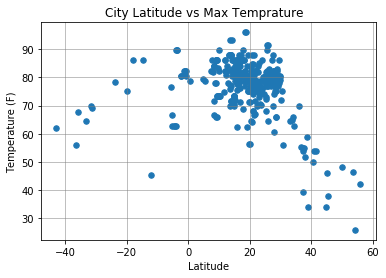

In [27]:
# create Lat vs. Max Temp correlation scatter plot
title = "City Latitude vs Max Temprature" + "  "
temp_plot = CA_list.plot.scatter(x='Lat',
                      y='Max Temp',s=30,title=title)
temp_plot.set_ylabel("Temperature (F)")
temp_plot.set_xlabel("Latitude")
temp_plot.grid(which='major', linestyle='-', linewidth='0.5', color='gray')

# output to png
plt.savefig('output_data/lat_temp.png')

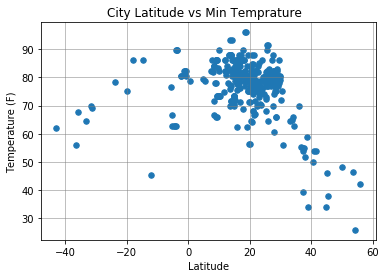

In [28]:
# create Lat vs. Min Temp correlation scatter plot
title = "City Latitude vs Min Temprature" + "  "
temp_plot = CA_list.plot.scatter(x='Lat',
                      y='Max Temp',s=30,title=title)
temp_plot.set_ylabel("Temperature (F)")
temp_plot.set_xlabel("Latitude")
temp_plot.grid(which='major', linestyle='-', linewidth='0.5', color='gray')

# output to png
plt.savefig('output_data/lat_temp.png')

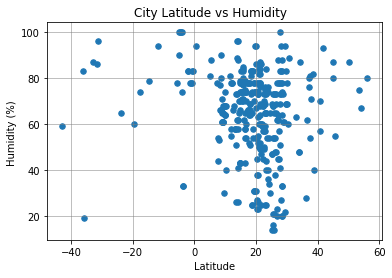

In [29]:
title = "City Latitude vs Humidity" + "  "
temp_plot = CA_list.plot.scatter(x='Lat',
                      y='Humidity',s=30,title=title)
temp_plot.set_ylabel("Humidity (%) ")
temp_plot.set_xlabel("Latitude")
temp_plot.grid(which='major', linestyle='-', linewidth='0.5', color='gray')

# output to png
plt.savefig('output_data/lat_humidity.png')

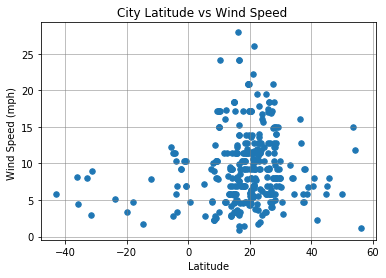

In [30]:
# create Lat vs. Wind Speed scatter plot
title = "City Latitude vs Wind Speed " + "  "
temp_plot = CA_list.plot.scatter(x='Lat',
                      y='Wind Speed',s=30,title=title)
temp_plot.set_ylabel("Wind Speed (mph) ")
temp_plot.set_xlabel("Latitude")
temp_plot.grid(which='major', linestyle='-', linewidth='0.5', color='gray')

# output to png
plt.savefig('output_data/lat_windspeed.png')

## Linear Regression

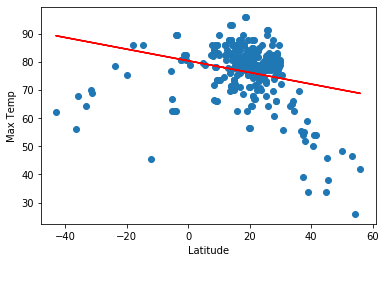

In [35]:
# create linear regressions for Northern Hemisphere - Max Temp vs. Latitude
x_values = CA_list['Lat']
y_values = CA_list['Max Temp']
fun.Lin_Reg(x_values,y_values,'Latitude','Max Temp')

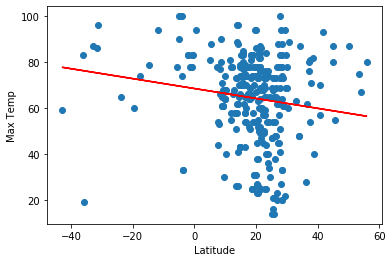

In [36]:
# create linear regressions for Humidity vs. Latitude
x_values = CA_list['Lat']
y_values = CA_list['Humidity']
fun.Lin_Reg(x_values,y_values,'Latitude','Max Temp')

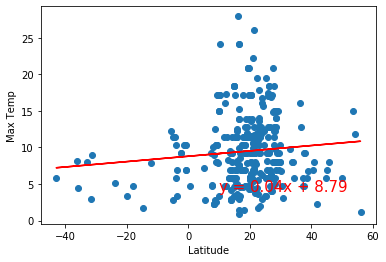

In [37]:
# create linear regressions for Wind Speed vs. Latitude
x_values = CA_list['Lat']
y_values = CA_list['Wind Speed']
fun.Lin_Reg(x_values,y_values,'Latitude','Max Temp')